In [66]:
%pip install tensorflow
%pip install tf_keras
%pip install wandb


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for wandb from https://files.pythonhosted.org/packages/d8/7b/e94b46d620d26b2e1f486f2746febdcb6579be20f361355b40263ddd8262/wandb-0.18.3-py3-none-win_amd64.whl.metadata
  Obtaining dependency information for docker-pycreds>=0.4.0 from https://files.pythonhosted.org/packages/f5/e8/f6bd1eee09314e7e6dee49cbe2c5e22314ccdb38db16c9fc72d2fa80d054/docker_pycreds-0.4.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for gitpython!=3.1.29,>=1.0.0 from https://files.pythonhosted.org/packages/e9/bd/cc3a402a6439c15c3d4294333e13042b915bbeab54edc457c723931fed3f/GitPython-3.1.43-py3-none-any.whl.metadata
  Using cached GitPython-3.1.43-py3-none-any.whl.metadata (13 kB)
  Obtaining dependency information for sentry-sdk>=1.0.0 from https://files.pythonhosted.org/packages/41/22/88712c958160e5a5c9fc63229d953feec44db1dda30109ece4d357edb41d/sentry_sdk-2.15.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for setproctitle from https://files.


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import tensorflow as tf
import os
from keras.src.utils import dataset_utils
from keras.src.utils import image_utils
from keras.src.utils.module_utils import tensorflow as tf

In [3]:
gpus = tf.config.experimental.list_physical_devices('CPU')

In [4]:
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [5]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu , True)

In [6]:
import cv2
import imghdr
import matplotlib.pyplot as plt

C:\Users\lalitha priya.a\AppData\Local\Temp\ipykernel_15968\2011824555.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [7]:
data_dir = 'data'

In [8]:
image_exts = ["jpeg","jpg","bmp","png"]

In [9]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir,image_class,image)
        try:
            img = cv2.imread(image_path)# can load to opencv
            tip = imghdr.what(image_path)# if the image exists in jpeg or anyother
            if tip not in image_exts:
                print("Image not in ext list{}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("Issue with image{}".format(image_path))        

API for datapipeline

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from keras.src.utils import dataset_utils
from keras.src.utils import image_utils
from keras.src.utils.module_utils import tensorflow as tf

data = tf.keras.preprocessing.image_dataset_from_directory('data', batch_size=32, image_size=(256, 256))


Found 239 files belonging to 4 classes.


Accesing the data pipeline

In [11]:
data_iterator = data.as_numpy_iterator()

In [12]:
data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x000001D029117050>)

In [13]:
batch = data_iterator.next()

Images as numpy arrays

In [14]:
batch[0].shape

(32, 256, 256, 3)

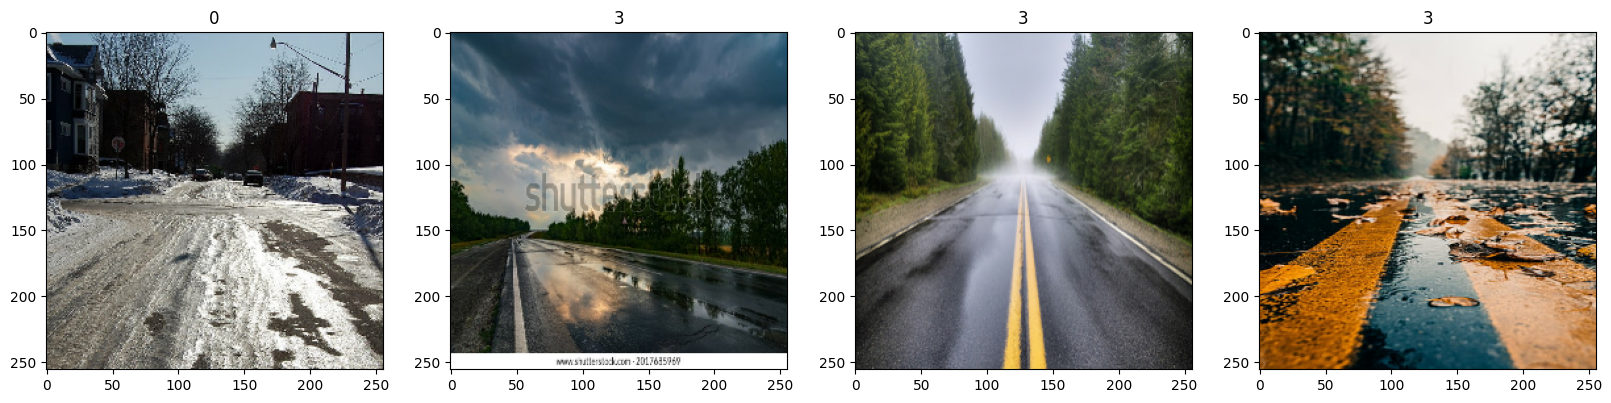

In [15]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [16]:
scaled = batch[0]/255

In [17]:
scaled.max()

1.0

Preprocessing data

In [18]:

data = data.map(lambda x,y: (x/255, y))

In [19]:

data.as_numpy_iterator().next()

(array([[[[9.25490201e-01, 8.94117653e-01, 8.50980401e-01],
          [9.25490201e-01, 8.94117653e-01, 8.50980401e-01],
          [9.21568632e-01, 8.98039222e-01, 8.50980401e-01],
          ...,
          [4.62859988e-01, 4.47740495e-01, 4.26455259e-01],
          [8.99574935e-01, 8.87810230e-01, 8.52516055e-01],
          [9.47863042e-01, 9.31751668e-01, 8.88756156e-01]],
 
         [[9.25490201e-01, 8.94117653e-01, 8.50980401e-01],
          [9.25490201e-01, 8.94117653e-01, 8.50980401e-01],
          [9.17647064e-01, 8.94117653e-01, 8.47058833e-01],
          ...,
          [8.06514263e-01, 7.86906421e-01, 7.63637424e-01],
          [6.52393520e-01, 6.51118279e-01, 6.12327695e-01],
          [9.47058797e-01, 9.34443951e-01, 8.89770985e-01]],
 
         [[9.25490201e-01, 8.94117653e-01, 8.50980401e-01],
          [9.25490201e-01, 8.94117653e-01, 8.50980401e-01],
          [9.21568632e-01, 8.98039222e-01, 8.50980401e-01],
          ...,
          [4.06640619e-01, 4.08436745e-01, 4.0042

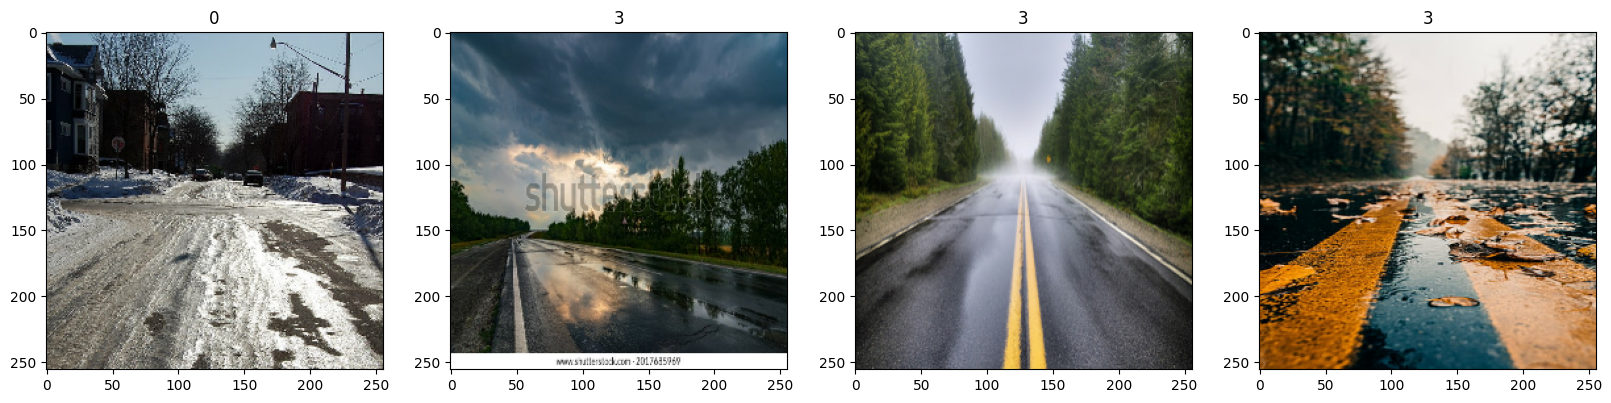

In [20]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [21]:
len(data)

8

In [22]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1


In [23]:
train_size+val_size+test_size

8

In [24]:
train = data.take(train_size)#how much data taken
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

Model

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [144]:
import keras
from keras import layers
from keras import ops
from tf_keras.layers import MaxPooling2D , Dense , Flatten 
from tf_keras.layers import Conv2D


In [145]:
import tf_keras
model = tf_keras.Sequential()

In [146]:
# convo2d- extracts info from the img
num_classes = 4
model.add(Conv2D(16,  (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


In [147]:
model.compile('adam', loss= tf.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [148]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 127, 127, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 30, 30, 16)       

Train

In [149]:
logdir = "logs"

In [150]:
from tf_keras.callbacks import TensorBoard
tensorboard_callback = TensorBoard(log_dir="logs")
hist = model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])


Epoch 1/20
5/5 [==============================] - 5s 822ms/step - loss: 3.9515 - accuracy: 0.2438 - val_loss: 1.5635 - val_accuracy: 0.3281
Epoch 2/20
5/5 [==============================] - 3s 616ms/step - loss: 1.4681 - accuracy: 0.3438 - val_loss: 1.3087 - val_accuracy: 0.4375
Epoch 3/20
5/5 [==============================] - 3s 684ms/step - loss: 1.2652 - accuracy: 0.5188 - val_loss: 1.2135 - val_accuracy: 0.5156
Epoch 4/20
5/5 [==============================] - 3s 696ms/step - loss: 1.1731 - accuracy: 0.5000 - val_loss: 0.9966 - val_accuracy: 0.6250
Epoch 5/20
5/5 [==============================] - 3s 658ms/step - loss: 0.9929 - accuracy: 0.5500 - val_loss: 0.9397 - val_accuracy: 0.5938
Epoch 6/20
5/5 [==============================] - 3s 680ms/step - loss: 0.9073 - accuracy: 0.5938 - val_loss: 0.8494 - val_accuracy: 0.6719
Epoch 7/20
5/5 [==============================] - 3s 544ms/step - loss: 0.8135 - accuracy: 0.6625 - val_loss: 0.7330 - val_accuracy: 0.7500
Epoch 8/20
5/5 [====

In [151]:
hist.history

{'loss': [3.951488494873047,
  1.4681137800216675,
  1.2651605606079102,
  1.1731220483779907,
  0.9929019212722778,
  0.907272458076477,
  0.8134519457817078,
  0.7019904851913452,
  0.6710813045501709,
  0.7131704092025757,
  0.5043470859527588,
  0.5896521806716919,
  0.4237131178379059,
  0.43991518020629883,
  0.3577973246574402,
  0.2467327117919922,
  0.2588818073272705,
  0.20342865586280823,
  0.16536398231983185,
  0.16488952934741974],
 'accuracy': [0.24375000596046448,
  0.34375,
  0.518750011920929,
  0.5,
  0.550000011920929,
  0.59375,
  0.6625000238418579,
  0.6875,
  0.71875,
  0.7250000238418579,
  0.84375,
  0.7437499761581421,
  0.84375,
  0.831250011920929,
  0.856249988079071,
  0.8999999761581421,
  0.90625,
  0.9312499761581421,
  0.9312499761581421,
  0.9437500238418579],
 'val_loss': [1.563468098640442,
  1.3086718320846558,
  1.2135241031646729,
  0.9965952634811401,
  0.9397393465042114,
  0.8493722677230835,
  0.7329823970794678,
  0.6200239658355713,
  0.5

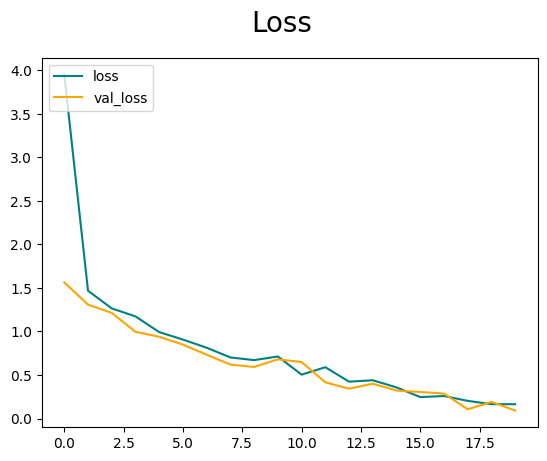

In [152]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

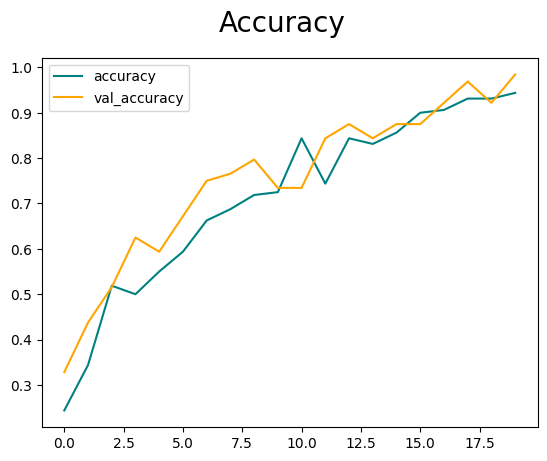

In [153]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [154]:
from tf_keras.metrics import Precision, Recall, BinaryAccuracy

In [155]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [156]:
from tf_keras.utils import to_categorical

# Convert y to one-hot encoded format
y_one_hot = to_categorical(y, num_classes=4)

# Use non-sparse metrics
pre = tf.keras.metrics.Precision()
re = tf.keras.metrics.Recall()
acc = tf.keras.metrics.CategoricalAccuracy()

for batch in test.as_numpy_iterator():
    X, y = batch

    # Convert y to one-hot for categorical metrics
    y_one_hot = to_categorical(y, num_classes=4)
    
    # Predict probabilities
    yhat = model.predict(X)

    # Update metrics with one-hot encoded y
    pre.update_state(y_one_hot, yhat)
    re.update_state(y_one_hot, yhat)
    acc.update_state(y_one_hot, yhat)


1/1 [==============================] - 0s 105ms/step


In [157]:
precision = pre.result().numpy()
recall = re.result().numpy()
accuracy = acc.result().numpy()

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Accuracy: {accuracy}")

Precision: 1.0
Recall: 1.0
Accuracy: 1.0


In [158]:

import cv2

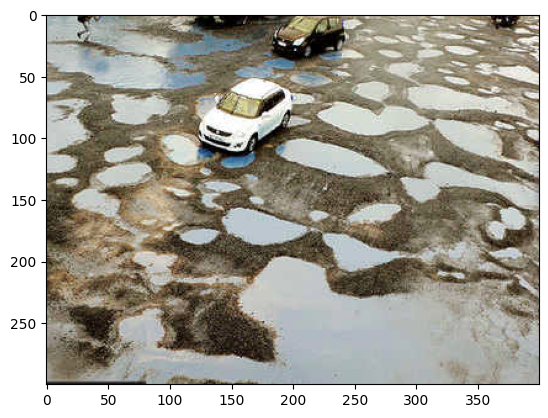

In [159]:
img = cv2.imread('potholetest.jpeg')
plt.imshow(img)
plt.show()

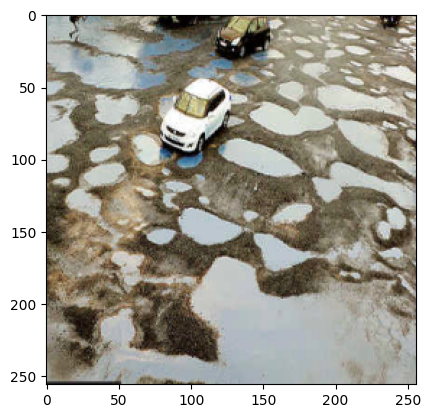

In [160]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [161]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 31ms/step


Classify the picture

In [162]:
road_conditions = ['Snowy', 'Icy', 'Pothole', 'Wet']

# Find the index of the class with the highest probability
predicted_class = np.argmax(yhat, axis=1)

# Print the predicted class for each sample in the batch
for i in range(len(predicted_class)):
    print(f'Predicted road condition: {road_conditions[predicted_class[i]]}')

Predicted road condition: Pothole


In [183]:
from tf_keras.models import load_model

In [181]:

model.save('roadclassifier.keras')